1. 데이터 전처리 및 데이터 결합

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 폴더 경로 지정하기
stats_data_path='./stats_data/'

salary_data_path='./salary_data/'

# 해당 폴더 안에 있는 파일 리스트 불러오기
stats_files = os.listdir(stats_data_path)

salary_files = os.listdir(salary_data_path)

# 오름 차순으로 파일 명 정렬
stats_files = sorted(stats_files, reverse=False)
salary_files = sorted(salary_files, reverse=False)

# 년도별 샐러리 캡
salary_cap = {
    2017: 99093000, 2018: 101869000, 2019: 109140000, 
    2020: 109140000, 2021: 112414000, 2022: 123655000,
    2023: 134000000, 2024: 143000000
}
base_salary_cap = salary_cap[2024]

all_data = [] # 데이터 병합을 위한 리스트
salary_year = int(salary_files[0][11:15]) # 연봉 데이터 년도

# 파일들을 시즌별로 처리
for i, (stats_file, salary_file) in enumerate(zip(stats_files, salary_files)):
    try:
        stats_file = stats_files[i]

        # 데이터 로드
        stats_data = pd.read_csv(stats_data_path + stats_file)
        salary_data = pd.read_csv(salary_data_path + salary_file)

        # 연봉 데이터의 이름에서 포지션 제거
        salary_data['NAME'] = salary_data['NAME'].str.split(',').str[0].str.strip()
        
        # 연봉 데이터의 컬럼명 변경
        salary_data.rename(columns={'NAME':'Player'}, inplace=True)
        
        # 연봉 데이터에서 $ 제거 및 숫자형으로 변환
        salary_data['SALARY'] = salary_data['SALARY'].replace(r'[\$,]', '', regex=True).astype(int)
        
        # 각 선수의 연봉이 시즌별 샐러리 캡에서 차지하는 비율 계산
        # 'SALARY_CAP_RATIO'는 선수 연봉의 상대적 가치를 평가하는 데 사용.
        currunt_salary_cap = salary_cap.get(salary_year)
        salary_data['SALARY_CAP_RATIO'] = (salary_data['SALARY'] / currunt_salary_cap)
        salary_data['SALARY_CAP_CALC'] = (salary_data['SALARY_CAP_RATIO'] * base_salary_cap).astype(int)
        # 이름을 기준으로 병합
        merged_data = pd.merge(
            stats_data, salary_data,
            how='inner',
            left_on=['Player'],
            right_on=['Player']
        )
        
        # 시즌 정보 추가
        merged_data['SEASON'] = f'{salary_year}-{salary_year+1}'
        
        # 병합된 데이터 추가
        all_data.append(merged_data)

        salary_year += 1 
    except Exception as e:
        print(f"에러 발생 개인 지표 파일 {stats_file}")
        print(f"에러 발생 개인 연봉 파일 {salary_file}")
        print(f"에러 : {e}")

# 모든 시즌 데이터를 하나의 데이터프레임으로 결합
final_data = pd.concat(all_data, ignore_index=True)

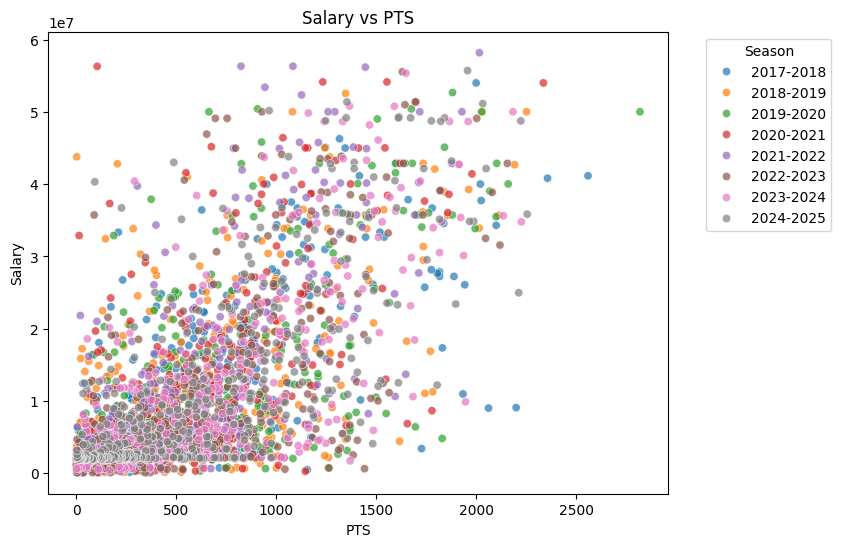

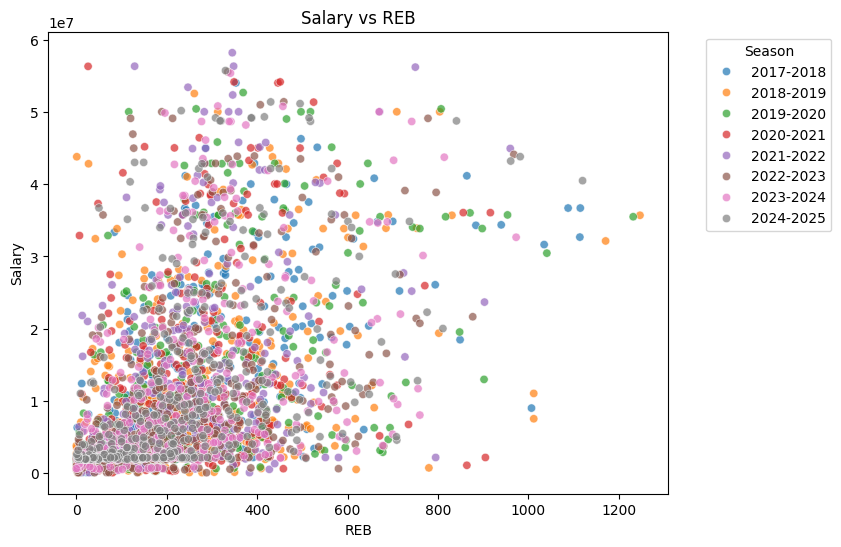

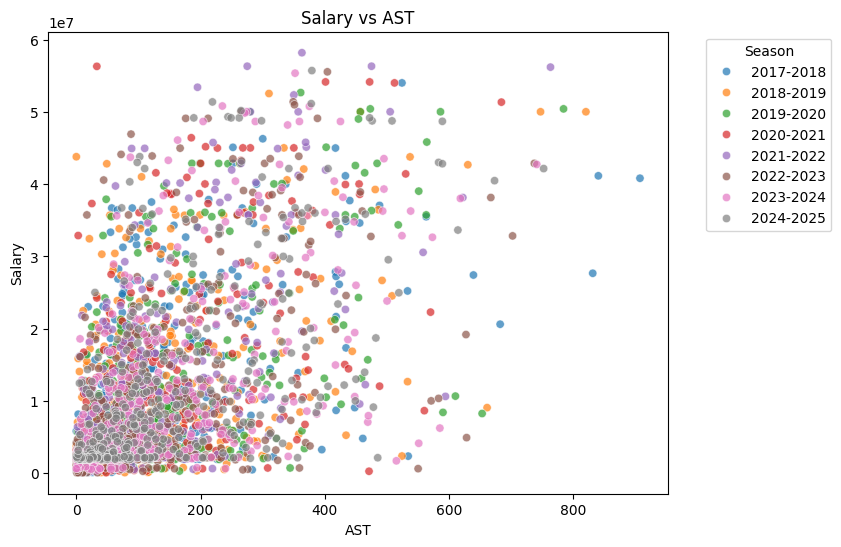

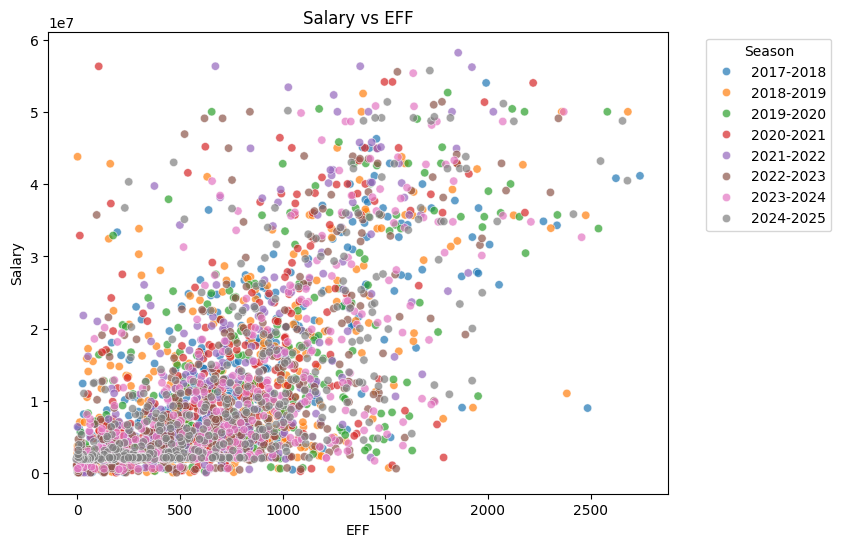

In [15]:
import seaborn as sns

# 2. 연봉과 주요 경기 지표 간 관계
performance_metrics = ['PTS', 'REB', 'AST', 'EFF']

# Function to plot scatter plots of salary vs performance metrics
def plot_salary_vs_metrics(data, metrics):
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x=metric, y='SALARY_CAP_CALC', hue='SEASON', alpha=0.7)
        plt.title(f"Salary vs {metric}")
        plt.xlabel(metric)
        plt.ylabel("Salary")
        plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

# Plot salary vs performance metrics
plot_salary_vs_metrics(final_data, performance_metrics)


In [104]:
# Function to plot average salary and top 10% salary trends by year
def plot_salary_trends(data):
    avg_salary_by_year = data.groupby('SEASON')['SALARY'].max()
    top_10_percent_salary_by_year = data.groupby('SEASON')['SALARY_CAP_CALC'].nlargest(40)
    # nsmallest
    print(top_10_percent_salary_by_year['2020-2021'])
    print(top_10_percent_salary_by_year['2019-2020'])
    print(top_10_percent_salary_by_year)
    top_10_percent_salary_by_year = top_10_percent_salary_by_year.reset_index(level=0)
    average_top_10_salary_by_season = top_10_percent_salary_by_year.groupby('SEASON')['SALARY_CAP_CALC'].mean()
    print(top_10_percent_salary_by_year)
 
    plt.figure(figsize=(12, 6))
    plt.plot(average_top_10_salary_by_season, marker='o', label='Average Salary')
    plt.title("Average Salary and Top 10% Salary Trends by Year")
    plt.xlabel("Year")
    plt.ylabel("Salary")
    plt.ticklabel_format(axis='y',useOffset=False, style='plain')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot salary trends
plot_salary_trends(final_data)


1510    56348815
1175    54190126
1190    54190126
1165    54054000
1171    51387188
1217    46448679
1292    45206199
1177    45045000
1201    45045000
1205    45045000
1181    45018467
1188    43305813
1173    42900000
1328    41589756
1166    41439016
1226    40955933
1183    40040000
1230    40040000
1207    39962433
1288    38773644
1195    38707233
1197    38707233
1167    38610000
1231    38610000
1174    38461093
1170    37671832
1215    37537500
1234    37341946
1485    37327843
1179    36346128
1168    36068507
1218    36064826
1256    36031702
1180    35750000
1209    35750000
1198    34369148
1558    32890407
1182    32365422
1222    31445849
1200    31098789
Name: SALARY_CAP_CALC, dtype: int64
776     52713408
786     50452876
864     50452876
769     50050000
774     50050000
924     50050000
793     49051408
857     45853677
778     45137849
771     42900000
785     42900000
787     42900000
789     42900000
821     42900000
880     42845873
796     42598151
790     4158

KeyError: 'Column not found: SALARY_CAP_RATIO'